In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
df=pd.read_csv('census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.shape

(32560, 15)

In [4]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [6]:
df.sample(5)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
8988,43,Private,60001,Bachelors,13,Divorced,Sales,Unmarried,White,Male,0,0,44,United-States,>50K
9811,44,Local-gov,83286,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,United-States,>50K
20178,54,Private,97778,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
23082,42,Private,289636,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,46,United-States,<=50K
12433,23,Private,163870,Some-college,10,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K


In [7]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [8]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Checking Null Values

<Axes: >

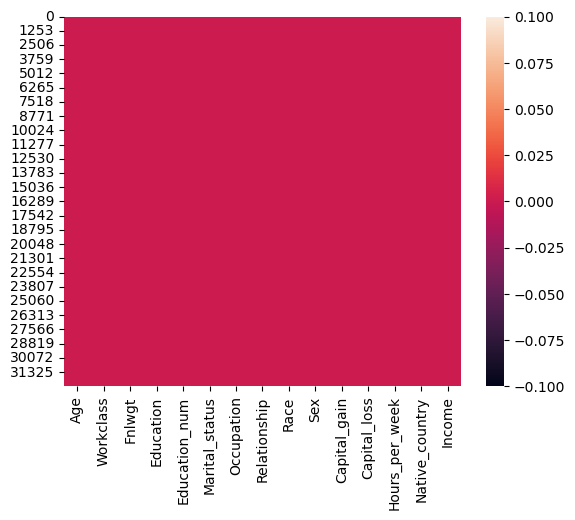

In [10]:
sns.heatmap(df.isnull())

In [11]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

The dataset has no null values.

In [12]:
df.iloc[26,:]

Age                                54
Workclass                           ?
Fnlwgt                         180211
Education                Some-college
Education_num                      10
Marital_status     Married-civ-spouse
Occupation                          ?
Relationship                  Husband
Race               Asian-Pac-Islander
Sex                              Male
Capital_gain                        0
Capital_loss                        0
Hours_per_week                     60
Native_country                  South
Income                           >50K
Name: 26, dtype: object

Here, we can also see that the data has some values with ? which represent null values. Therefore, we need to treat them.

In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
Fnlwgt,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
Education_num,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
Capital_gain,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
Capital_loss,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
Hours_per_week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


 Data Visualization

<Axes: xlabel='Age', ylabel='Density'>

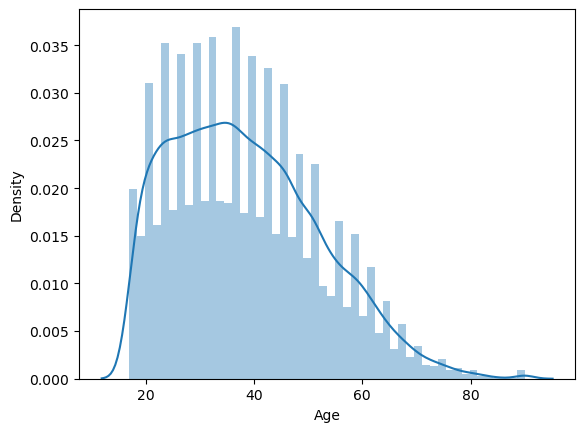

In [14]:
sns.distplot(df.Age)

Here, we can see that our data is right skewed, with majority of the ages falling in 20–50. The count keeps on decreasing as the age increases.

In [15]:
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

<Axes: xlabel='Workclass', ylabel='count'>

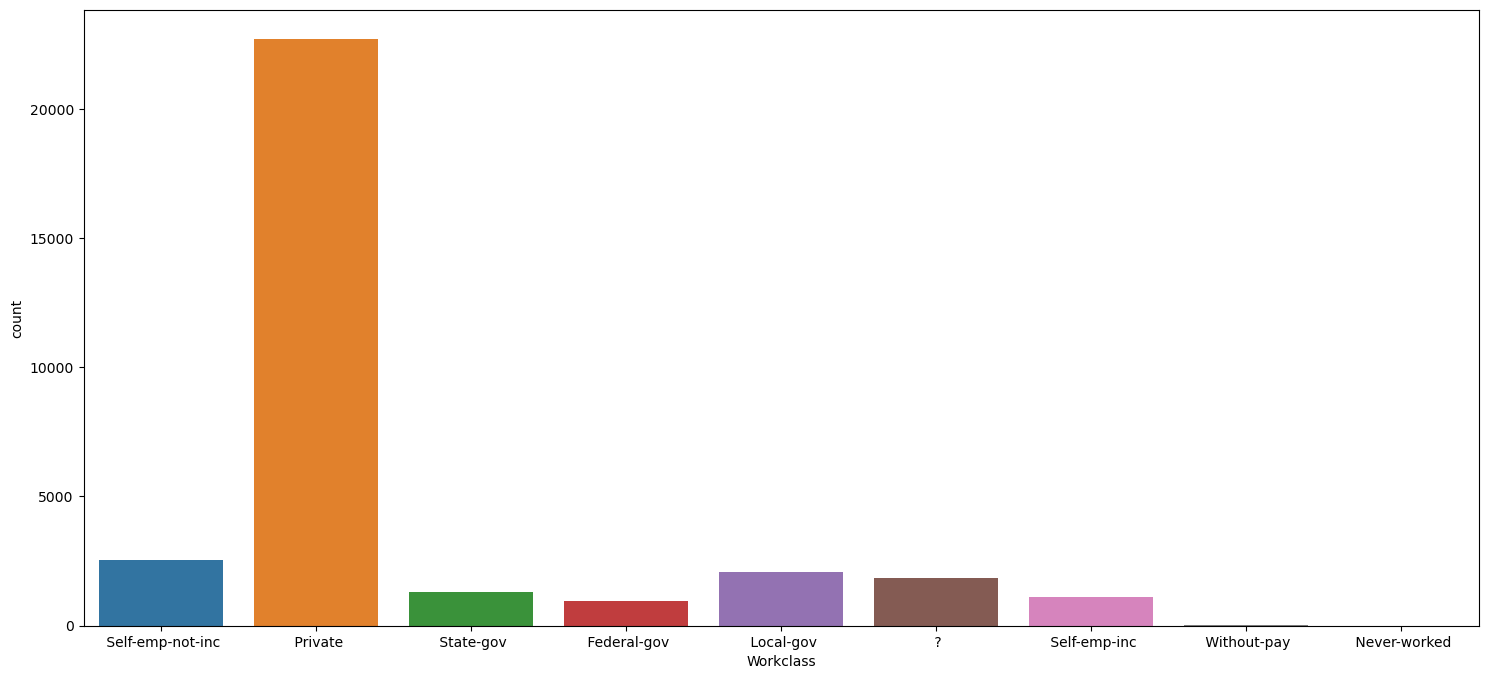

In [16]:
plt.figure(figsize=[18,8])
sns.countplot(data=df, x='Workclass')

We can see from above graph that majority of the people belong to Private sector workclass.

<Axes: xlabel='Education', ylabel='count'>

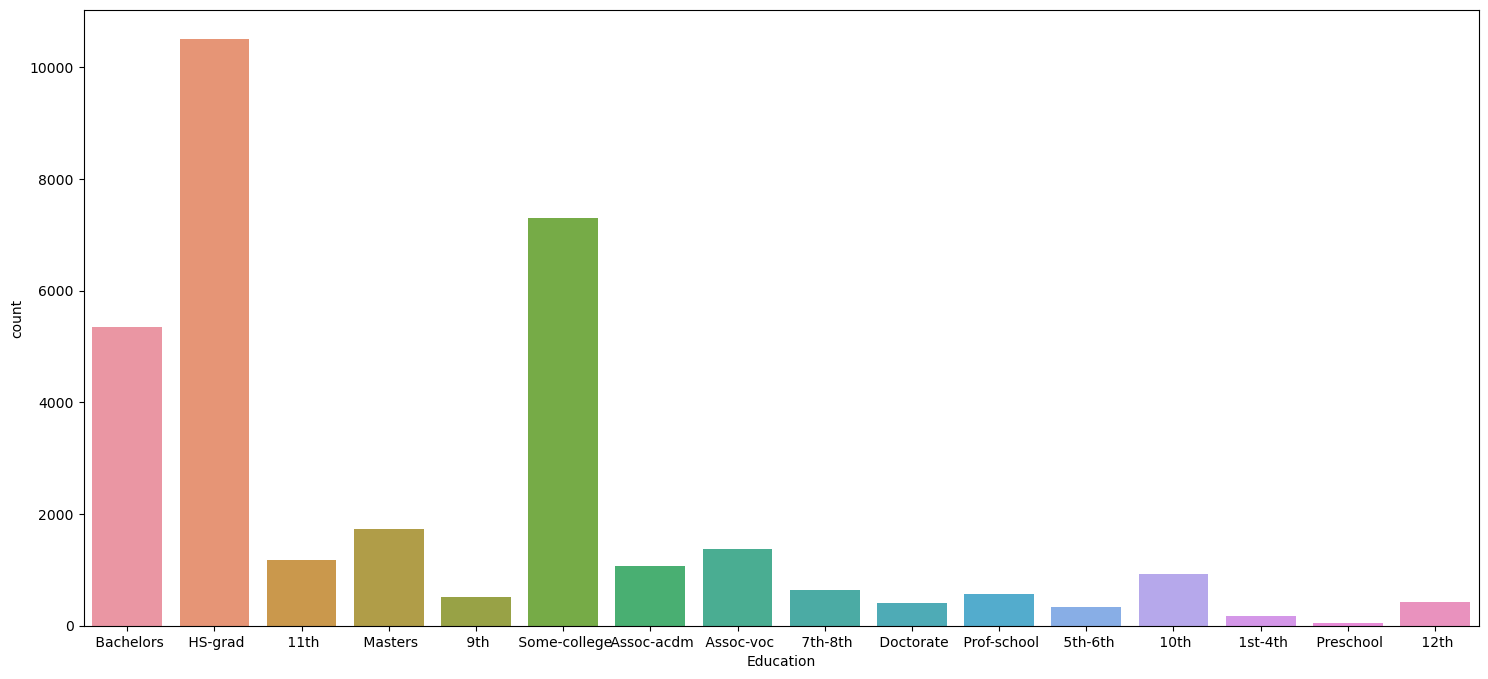

In [17]:
plt.figure(figsize=[18,8])
sns.countplot(data=df, x='Education')

We can see that there are no missing values in this column, and majority of the people have education level as ‘HS-grad’, followed by ‘Some-college’ and ‘Bachelors’.

<Axes: xlabel='Education_num', ylabel='count'>

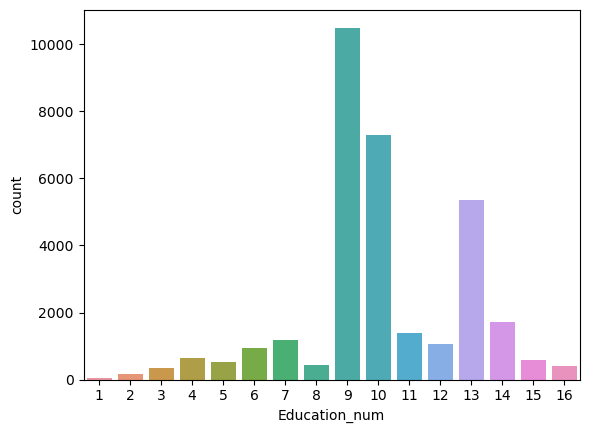

In [18]:
sns.countplot(data=df, x='Education_num')

Here, the count of Education column and Education_num is exactly same. means, This means that this column is providing same information but in a numeric manner. 

<Axes: xlabel='Marital_status', ylabel='count'>

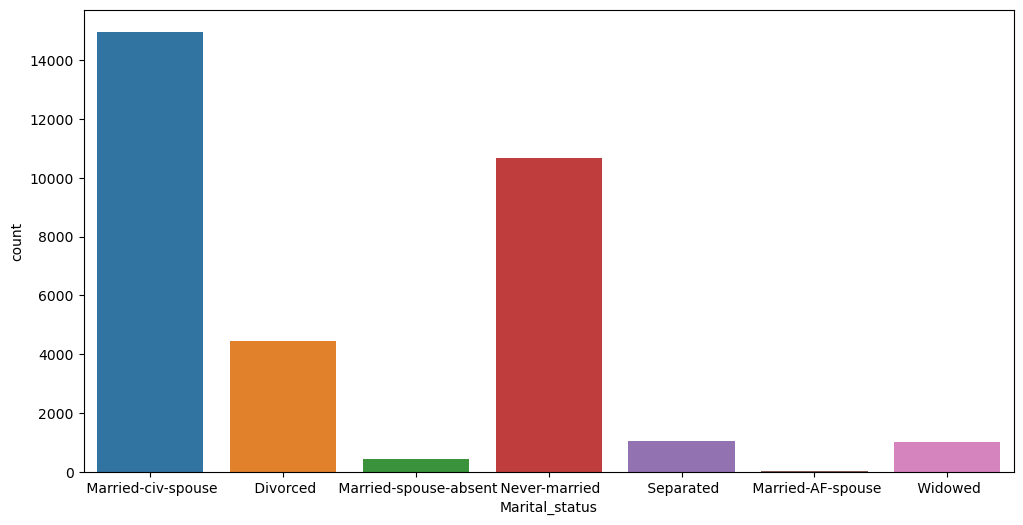

In [19]:
plt.figure(figsize=[12,6])
sns.countplot(data=df, x='Marital_status')

Here, majority of the people have Marital_Status as Married-civ-spouse and least have Married-AF-spouse.

In [20]:
df['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

<Axes: xlabel='Occupation', ylabel='count'>

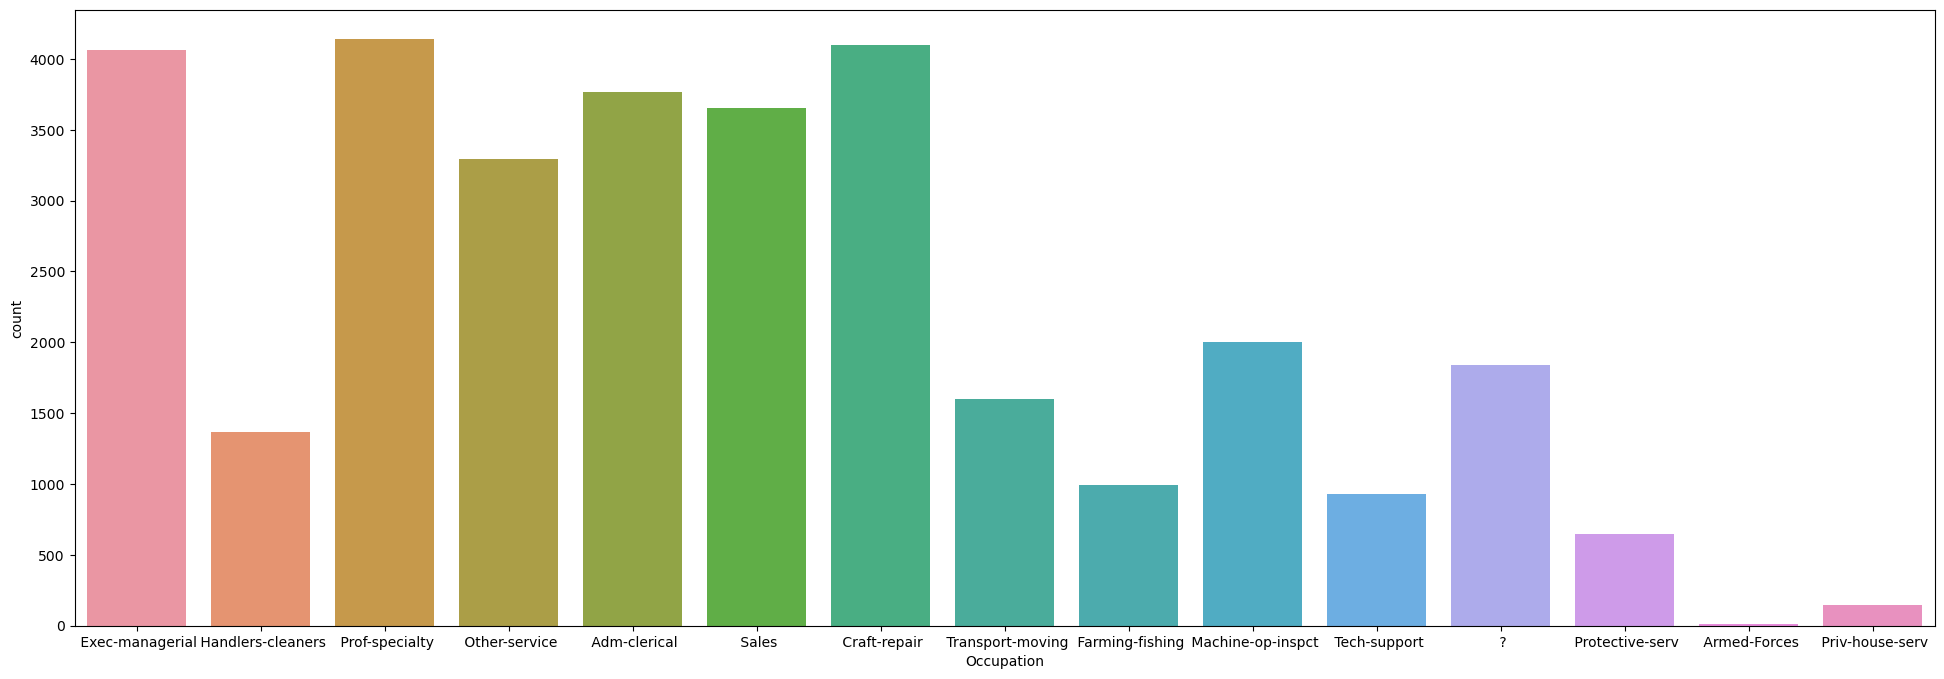

In [21]:
plt.figure(figsize=[24,8])
sns.countplot(data=df, x='Occupation')

Here, the count of missing values is higher than Workclass column i.e. 1843

<Axes: xlabel='Relationship', ylabel='count'>

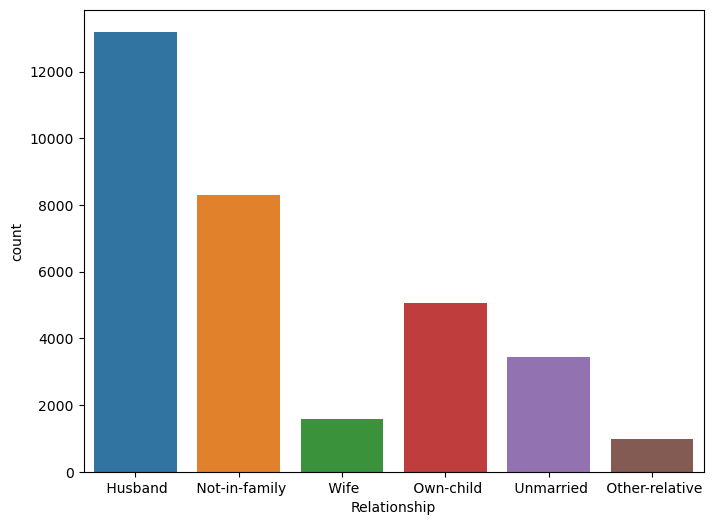

In [22]:
plt.figure(figsize=[8,6])
sns.countplot(data=df, x='Relationship')

Here, the highest number is for ‘Husband’ and lowest is for ‘Other-relative’. The column does not have any missing value.

<Axes: xlabel='Race', ylabel='count'>

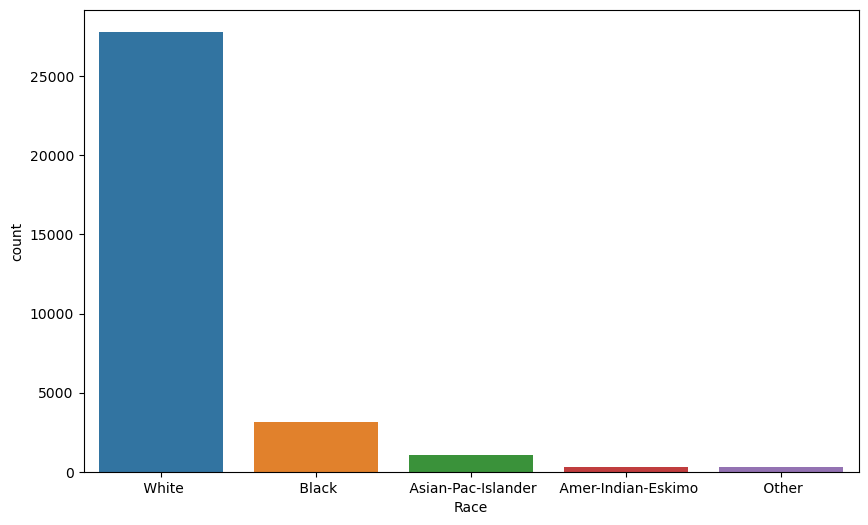

In [23]:
plt.figure(figsize=[10,6])
sns.countplot(data=df, x='Race')

Here, the highest number of people have race as White

<Axes: xlabel='Sex', ylabel='count'>

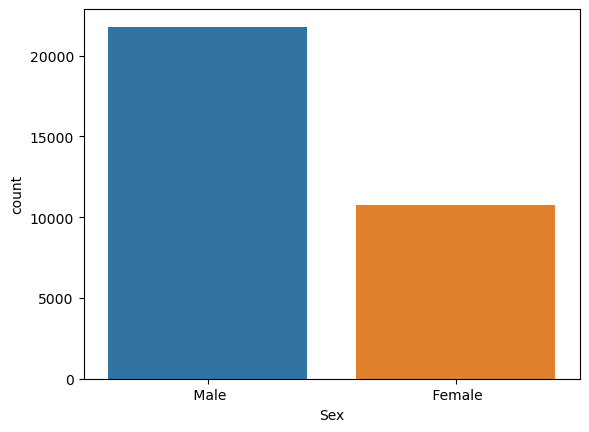

In [24]:
sns.countplot(data=df, x='Sex')

Here, number of males are almost double to number of females.

<Axes: xlabel='Capital_gain', ylabel='Density'>

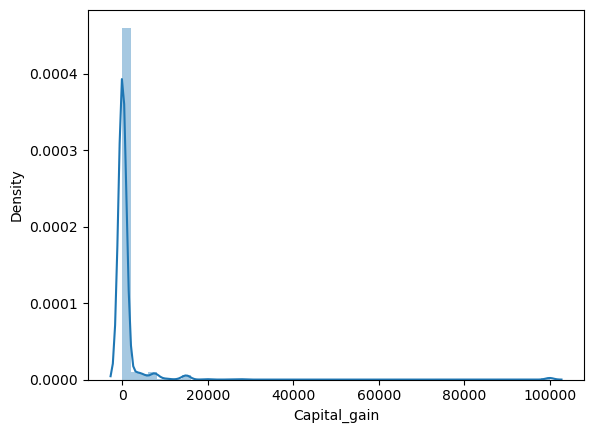

In [25]:
sns.distplot(df.Capital_gain)

Here, the distribution plot for ‘Capital_gain’ column is highly right skewed.

<Axes: xlabel='Capital_loss', ylabel='Density'>

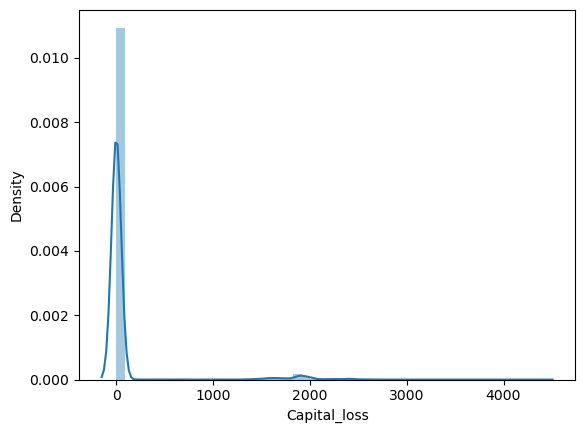

In [26]:
sns.distplot(df.Capital_loss)

Here, the distribution plot for ‘Capital_loss’ column is also right skewed.

<Axes: xlabel='Hours_per_week', ylabel='Density'>

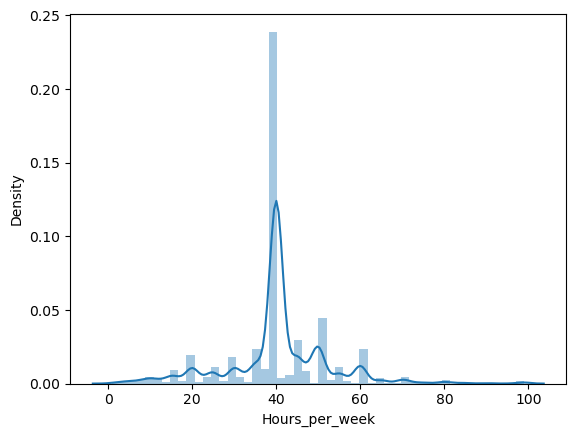

In [27]:
sns.distplot(df.Hours_per_week)

Here, majority of the values have data near 40 hours.

<Axes: xlabel='Native_country', ylabel='count'>

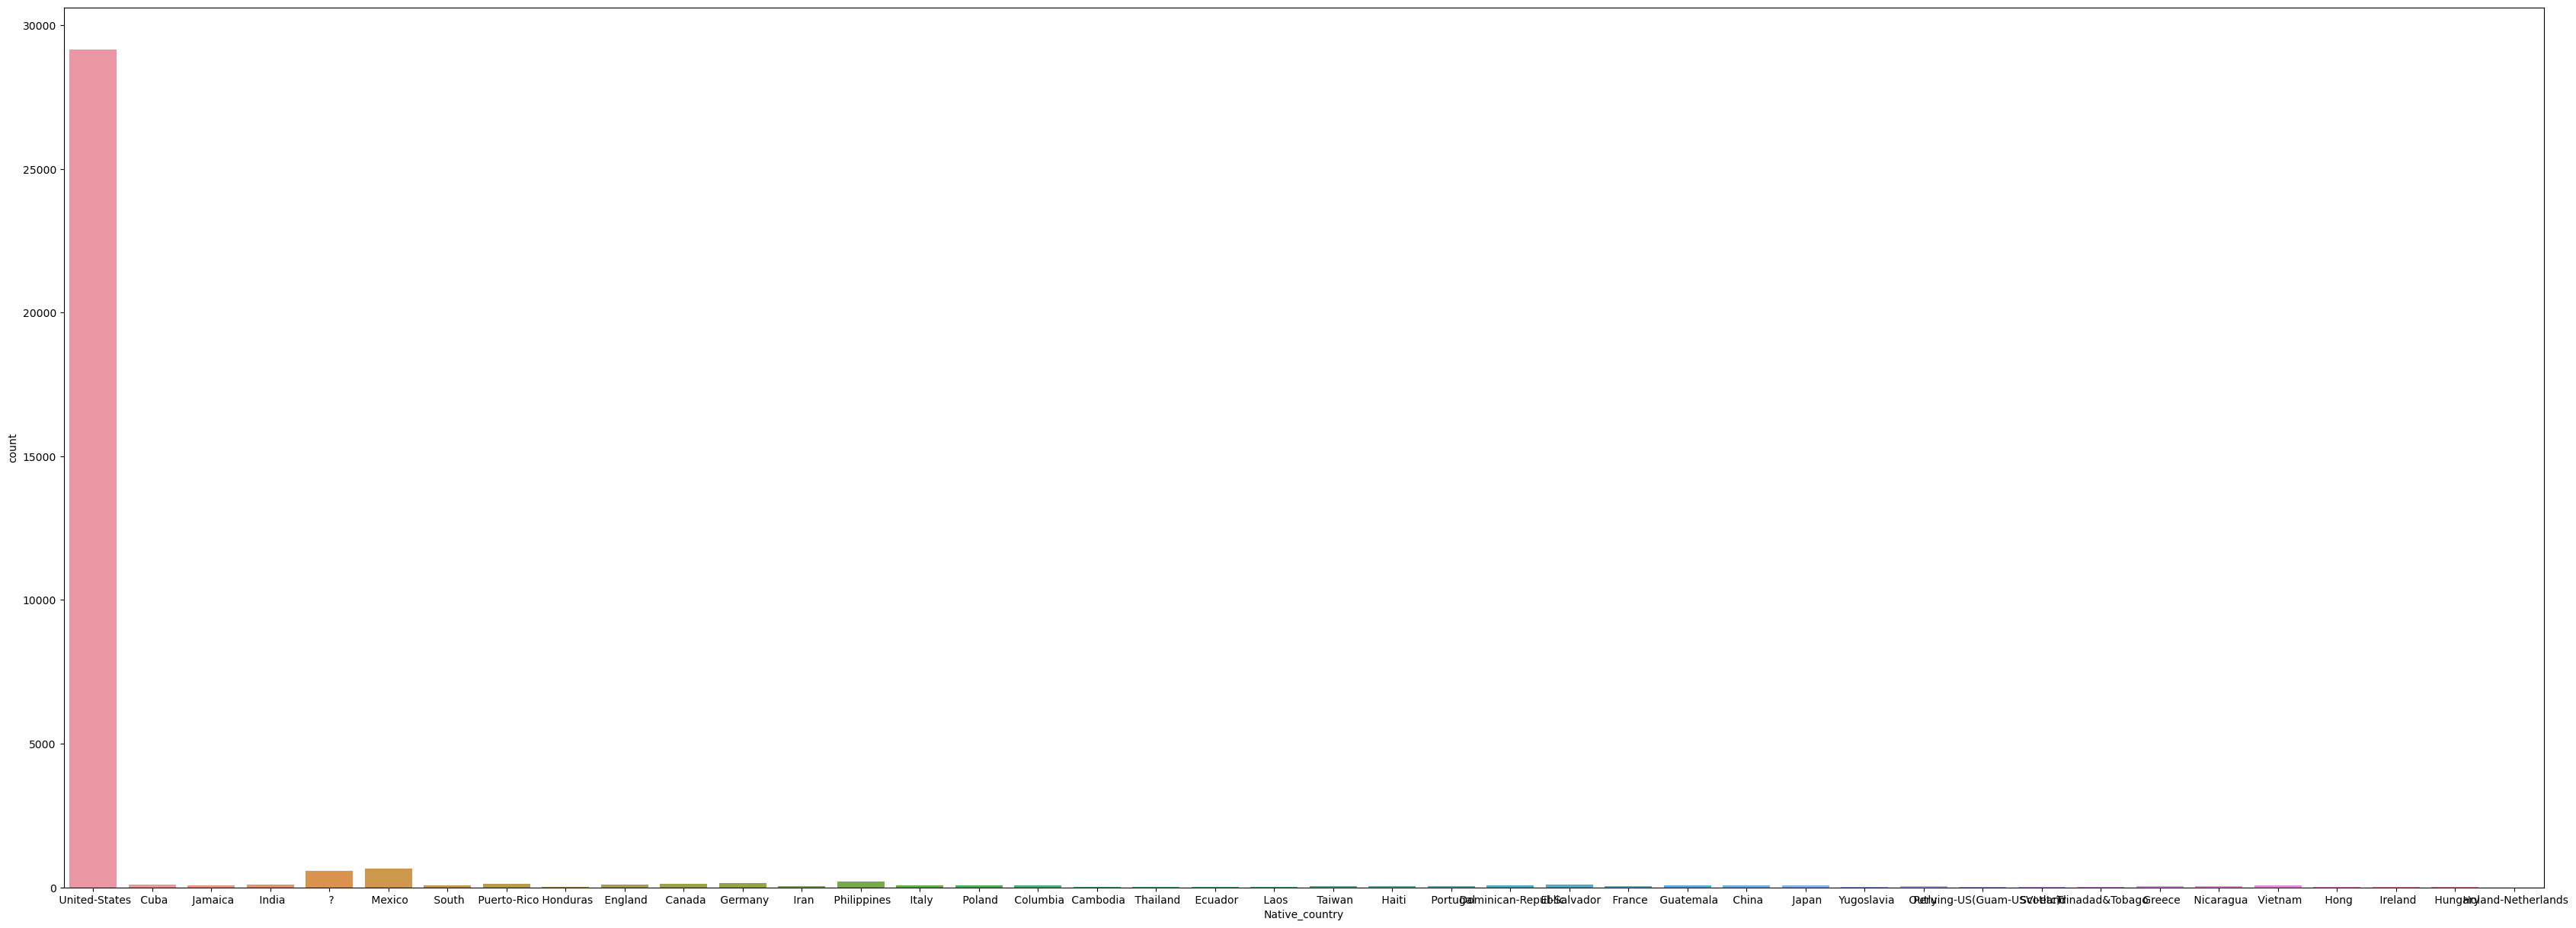

In [28]:
plt.figure(figsize=[42,15])
sns.countplot(data=df, x='Native_country')

The highest count set to United-States and also there are 583 missing values in this column, which need to be treated.

Further, lets check how the income gets impacted due to the other features.

<Axes: xlabel='Relationship', ylabel='count'>

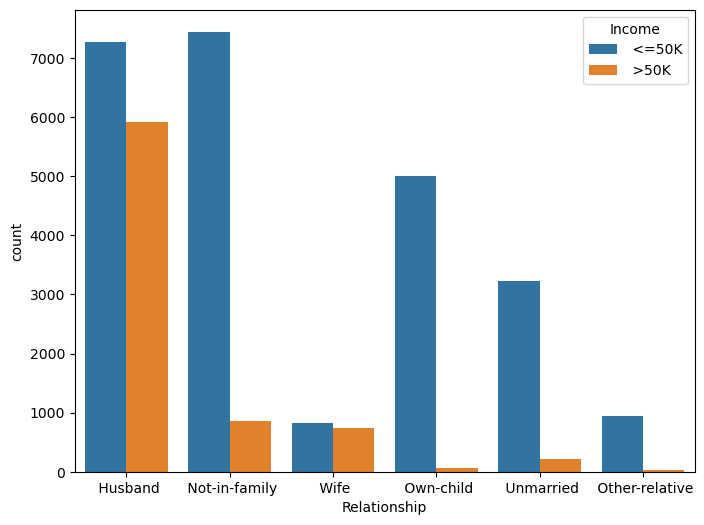

In [29]:
plt.figure(figsize=[8,6])
sns.countplot(data=df, x='Relationship', hue='Income')

If the relationship in family is either ‘Husband/Wife’, the chances of earning more than 50K is high.

<Axes: xlabel='Education', ylabel='count'>

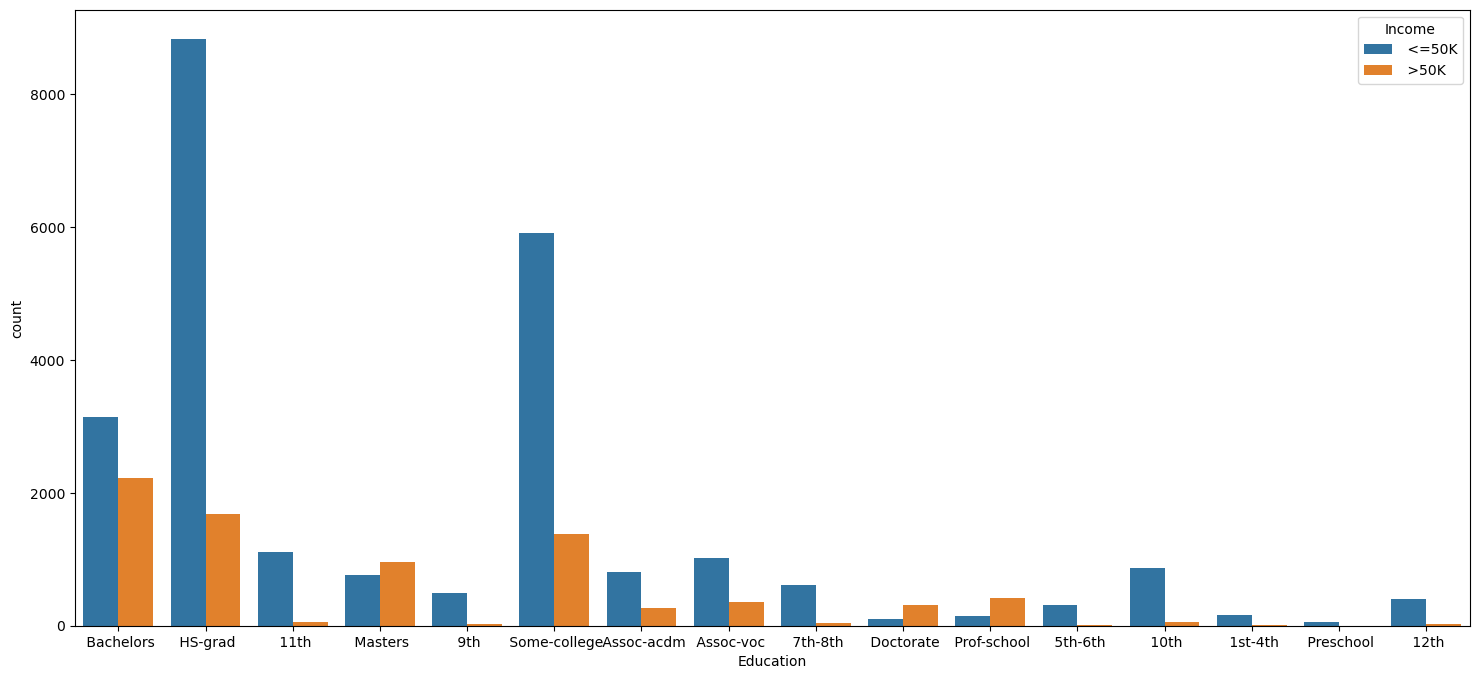

In [30]:
plt.figure(figsize=[18,8])
sns.countplot(data=df, x='Education', hue='Income')

People with education level as ‘Masters/Doctorate/Prof-school’ have higher ratios of >50K earning, than <=50K. Bachelors degree also has around 10:7 ratio of <=50K : >50K.

<Axes: xlabel='Workclass', ylabel='count'>

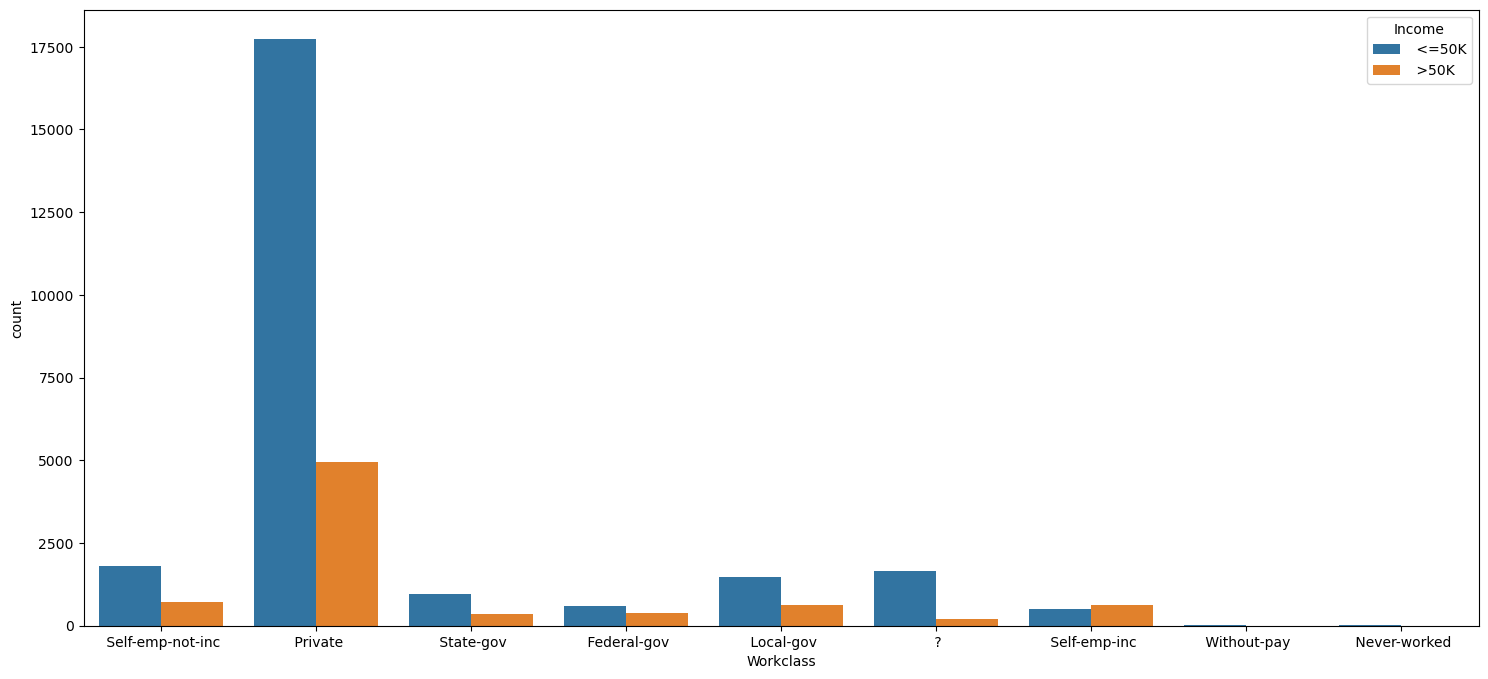

In [31]:
plt.figure(figsize=[18,8])
sns.countplot(data=df, x='Workclass', hue='Income')

Ratio of people earning more than 50K is higher in case Workclass is ‘Self-emp-inc’.

<Axes: xlabel='Sex', ylabel='count'>

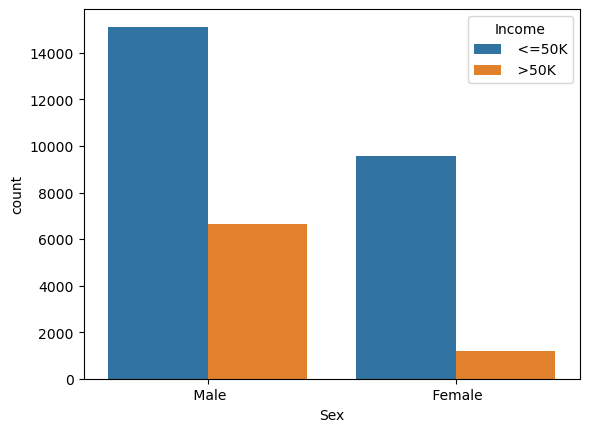

In [32]:
sns.countplot(data=df, x='Sex', hue='Income')

Males have a higher chance of earning more than 50K, than females.

<Axes: xlabel='Race', ylabel='count'>

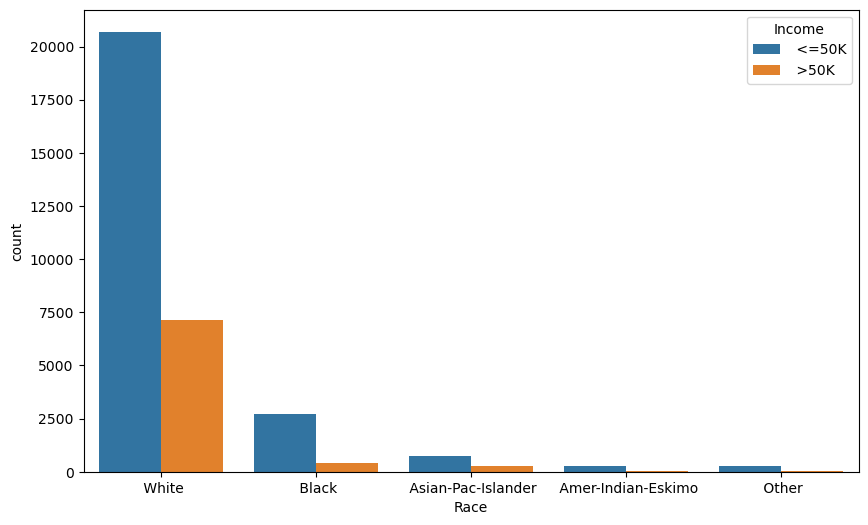

In [33]:
plt.figure(figsize=[10,6])
sns.countplot(data=df, x='Race', hue='Income')

A person has high chance of earning >50K in case his/her race is ‘White’/’Asian-pac-islander’.

Checking Correlation

<Axes: >

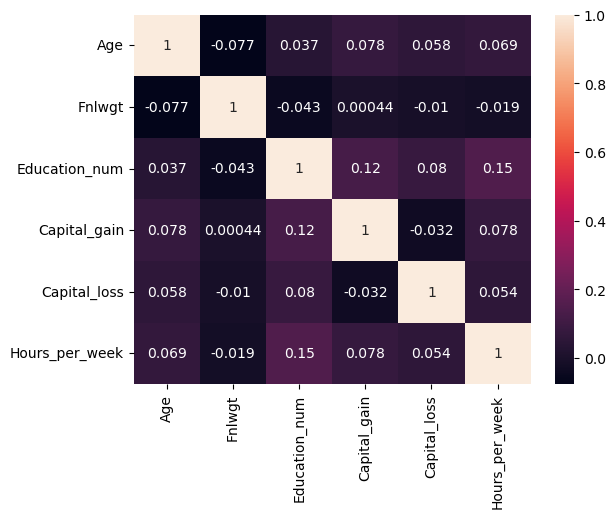

In [34]:
sns.heatmap(df.corr(),annot=True)

Income has 34% correlation with ‘Education_num’, 23% correlation with ‘hours_per_week’ and ‘age’, and 22% correlation with ‘Capital_gain’.

Replacing missing values

In [35]:
df['Workclass']=df['Workclass'].replace('?','Private')
df['Occupation']=df['Occupation'].replace('?','Prof-specialty')
df['Native_country']=df['Native_country'].replace('?','United-States')

Checking Outliers

In [36]:
df.shape

(32560, 15)

Age                  Axes(0.125,0.653529;0.227941x0.226471)
Fnlwgt            Axes(0.398529,0.653529;0.227941x0.226471)
Education_num     Axes(0.672059,0.653529;0.227941x0.226471)
Capital_gain         Axes(0.125,0.381765;0.227941x0.226471)
Capital_loss      Axes(0.398529,0.381765;0.227941x0.226471)
Hours_per_week    Axes(0.672059,0.381765;0.227941x0.226471)
dtype: object

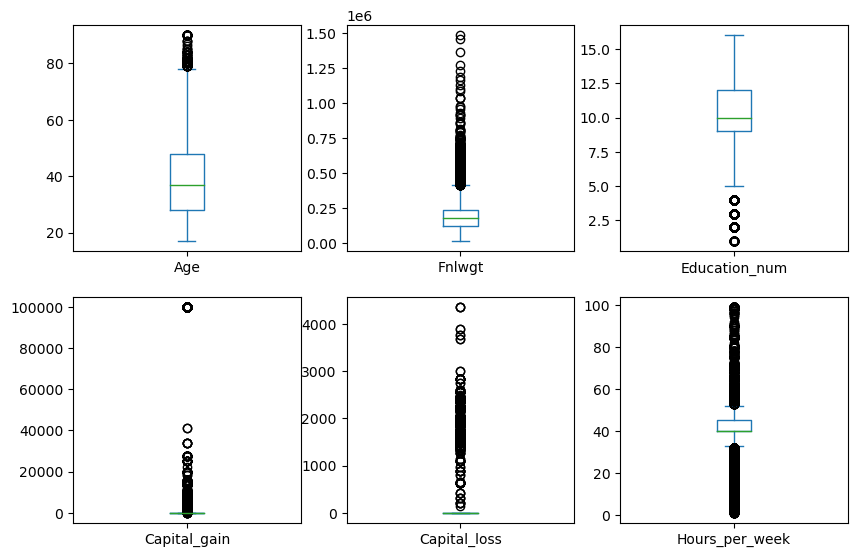

In [37]:
df.plot(kind='box',subplots=True,layout=(3,3),figsize=(10,10))

Removing Outliers

In [38]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]

In [39]:
Q1 = df['Fnlwgt'].quantile(0.25)
Q3 = df['Fnlwgt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Fnlwgt'] >= lower_bound) & (df['Fnlwgt'] <= upper_bound)]

In [40]:
Q1 = df['Education_num'].quantile(0.25)
Q3 = df['Education_num'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Education_num'] >= lower_bound) & (df['Education_num'] <= upper_bound)]

In [41]:
Q1 = df['Capital_gain'].quantile(0.25)
Q3 = df['Capital_gain'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Capital_gain'] >= lower_bound) & (df['Capital_gain'] <= upper_bound)]

In [42]:
Q1 = df['Capital_loss'].quantile(0.25)
Q3 = df['Capital_loss'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Capital_loss'] >= lower_bound) & (df['Capital_loss'] <= upper_bound)]

In [43]:
Q1 = df['Hours_per_week'].quantile(0.25)
Q3 = df['Hours_per_week'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Hours_per_week'] >= lower_bound) & (df['Hours_per_week'] <= upper_bound)]

In [44]:
df.shape

(19004, 15)

Age                  Axes(0.125,0.653529;0.227941x0.226471)
Fnlwgt            Axes(0.398529,0.653529;0.227941x0.226471)
Education_num     Axes(0.672059,0.653529;0.227941x0.226471)
Capital_gain         Axes(0.125,0.381765;0.227941x0.226471)
Capital_loss      Axes(0.398529,0.381765;0.227941x0.226471)
Hours_per_week    Axes(0.672059,0.381765;0.227941x0.226471)
dtype: object

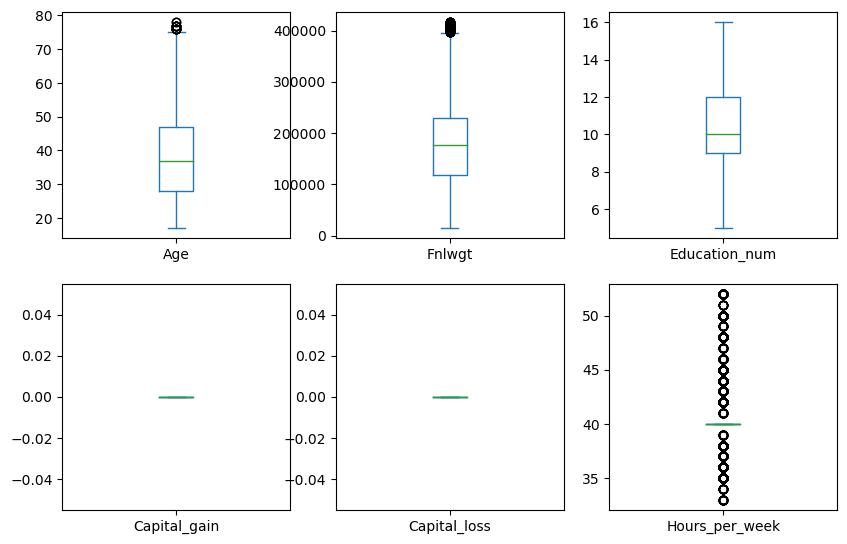

In [45]:
df.plot(kind='box',subplots=True,layout=(3,3),figsize=(10,10))

We can see most of the outliers are removed now.

Checking Skewness

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Fnlwgt'}>],
       [<Axes: title={'center': 'Education_num'}>,
        <Axes: title={'center': 'Capital_gain'}>],
       [<Axes: title={'center': 'Capital_loss'}>,
        <Axes: title={'center': 'Hours_per_week'}>]], dtype=object)

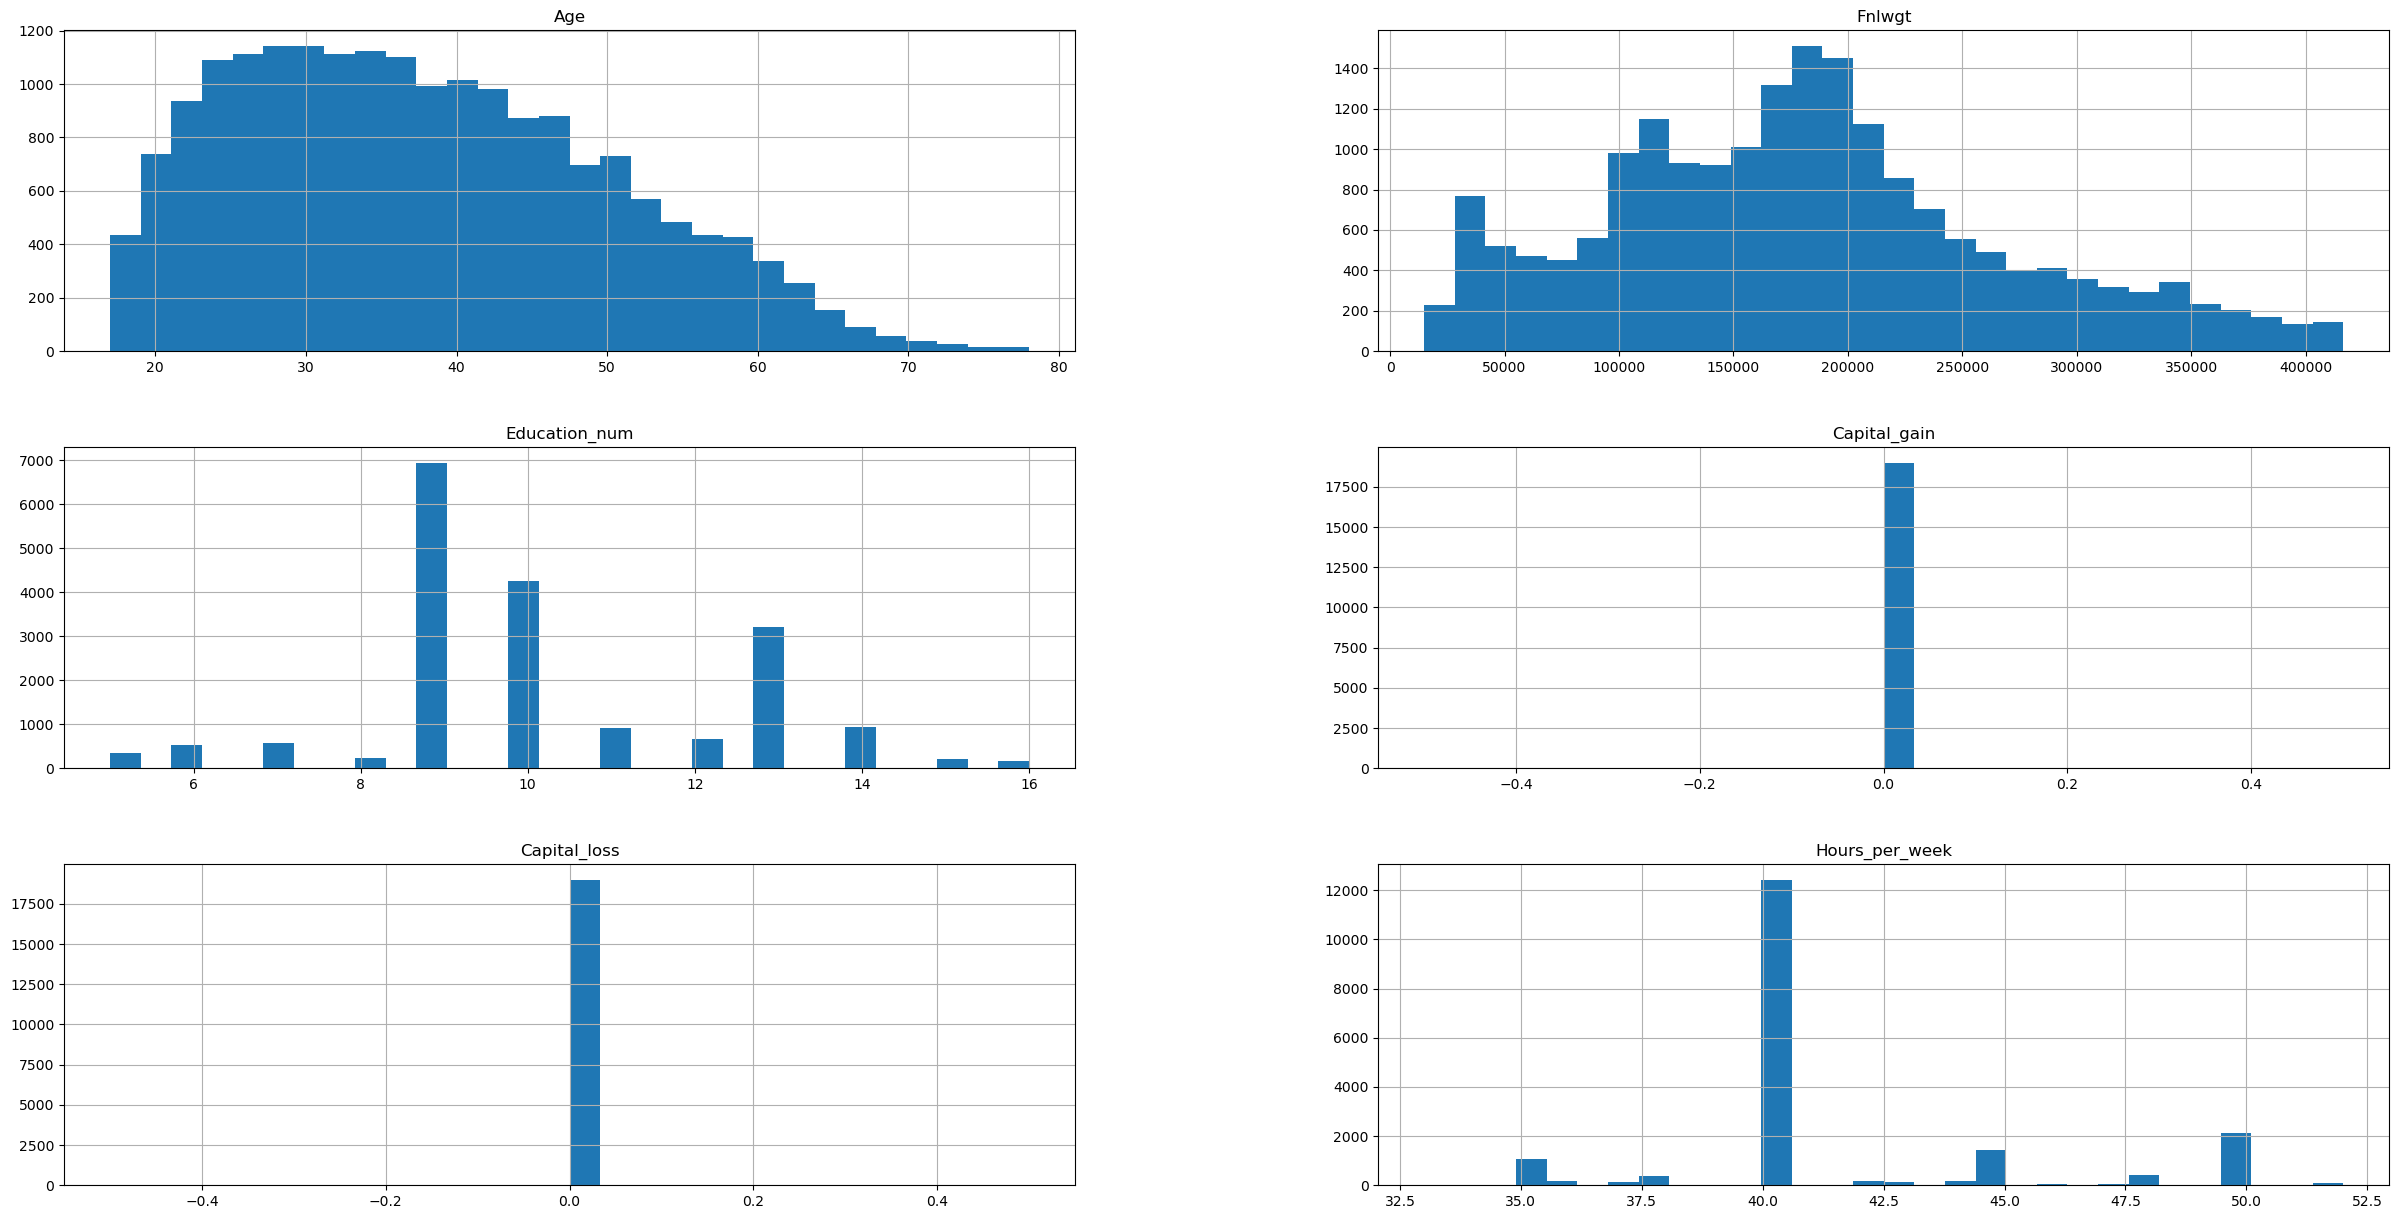

In [46]:
df.hist(bins=30,figsize=(30,15))

In [47]:
df.skew()

Age               0.434955
Fnlwgt            0.412683
Education_num     0.261111
Capital_gain      0.000000
Capital_loss      0.000000
Hours_per_week    1.067369
dtype: float64

The skewness in dataset is balanced.

Using LabelEncoder for converting Categorical datatype columns to Numerical datatype

In [48]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [49]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [50]:
df['Workclass'] = encoder.fit_transform(df['Workclass'])
df['Education'] = encoder.fit_transform(df['Education'])
df['Marital_status'] = encoder.fit_transform(df['Marital_status'])
df['Occupation'] = encoder.fit_transform(df['Occupation'])
df['Relationship'] = encoder.fit_transform(df['Relationship'])
df['Race'] = encoder.fit_transform(df['Race'])
df['Sex'] = encoder.fit_transform(df['Sex'])
df['Native_country'] = encoder.fit_transform(df['Native_country'])
df['Income'] = encoder.fit_transform(df['Income'])

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19004 entries, 1 to 32557
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             19004 non-null  int64
 1   Workclass       19004 non-null  int32
 2   Fnlwgt          19004 non-null  int64
 3   Education       19004 non-null  int32
 4   Education_num   19004 non-null  int64
 5   Marital_status  19004 non-null  int32
 6   Occupation      19004 non-null  int32
 7   Relationship    19004 non-null  int32
 8   Race            19004 non-null  int32
 9   Sex             19004 non-null  int32
 10  Capital_gain    19004 non-null  int64
 11  Capital_loss    19004 non-null  int64
 12  Hours_per_week  19004 non-null  int64
 13  Native_country  19004 non-null  int32
 14  Income          19004 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 1.7 MB


Implementing Machine Learning

In [52]:
x=df.iloc[:,0:13]
y=df.iloc[:,14]

In [53]:
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week
1,38,4,215646,8,9,0,6,1,4,1,0,0,40
2,53,4,234721,1,7,2,6,0,2,1,0,0,40
3,28,4,338409,6,13,2,10,5,2,0,0,0,40
4,37,4,284582,9,14,2,4,5,4,0,0,0,40
6,52,6,209642,8,9,2,4,0,4,1,0,0,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32553,53,4,321865,9,14,2,4,0,4,1,0,0,40
32554,22,4,310152,11,10,4,11,1,4,1,0,0,40
32555,27,4,257302,4,12,2,13,5,4,0,0,0,38
32556,40,4,154374,8,9,2,7,0,4,1,0,0,40


In [54]:
y

1        0
2        0
3        0
4        0
6        1
        ..
32553    1
32554    0
32555    0
32556    1
32557    0
Name: Income, Length: 19004, dtype: int32

Creating train test split

Training phase will get 70% of distribution and testing phase will get 30% of distribution.

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(13302, 13)
(5702, 13)
(13302,)
(5702,)


In [56]:
LR=LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [57]:
LRpred=LR.predict(x_test)
LRpred

array([0, 0, 0, ..., 0, 0, 0])

In [58]:
accuracy_score(y_test,LRpred)

0.7920028060329709

In [59]:
confusion_matrix(y_test,LRpred)

array([[4516,    0],
       [1186,    0]], dtype=int64)

In [60]:
print(classification_report(y_test,LRpred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      4516
           1       0.00      0.00      0.00      1186

    accuracy                           0.79      5702
   macro avg       0.40      0.50      0.44      5702
weighted avg       0.63      0.79      0.70      5702



The accuracy score using Logistic Regression is 79.2%

Using Random Forest Classifier

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(15203, 13)
(3801, 13)
(15203,)
(3801,)


Training phase got 70% of distribution and testing phase got 20% of distribution

In [62]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)

RandomForestClassifier()

In [63]:
RFCpred=RFC.predict(x_test)
RFCpred

array([0, 1, 1, ..., 1, 0, 0])

In [64]:
accuracy_score(y_test,RFCpred)

0.833201789002894

In [65]:
confusion_matrix(y_test,RFCpred)

array([[2776,  243],
       [ 391,  391]], dtype=int64)

In [66]:
print(classification_report(y_test,RFCpred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      3019
           1       0.62      0.50      0.55       782

    accuracy                           0.83      3801
   macro avg       0.75      0.71      0.72      3801
weighted avg       0.82      0.83      0.83      3801



The accuracy score using Random Forest CLassifier is 84%

Saving the model

In [67]:
import joblib
joblib.dump(RFC,'Census_Income_Final.obj')

['Census_Income_Final.obj']